In [662]:
#import the tool
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import datetime
import folium
import seaborn as sns
print("I'm ready to go")

I'm ready to go


#### From World Health Organization - On 31 December 2019, WHO was alerted to several cases of pneumonia in Wuhan City, Hubei Province of China. The virus did not match any other known virus. This raised concern because when a virus is new, we do not know how it affects people.
So daily level information on the affected people can give some interesting insights when it is made available to the broader data science community.
Johns Hopkins University has made an excellent dashboard using the affected cases data. This data is extracted from the same link and made available in csv format.(https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6)


#### 2019 Novel Coronavirus (2019-nCoV) is a virus (more specifically, a coronavirus) identified as the cause of an outbreak of respiratory illness first detected in Wuhan, China. Early on, many of the patients in the outbreak in Wuhan, China reportedly had some link to a large seafood and animal market, suggesting animal-to-person spread. However, a growing number of patients reportedly have not had exposure to animal markets, indicating person-to-person spread is occurring. At this time, it’s unclear how easily or sustainably this virus is spreading between people - CDC
This dataset has daily level information on the number of affected cases, deaths and recovery from 2019 novel coronavirus.

The data is available from 01 Mar, 2020.


In [663]:
new = pd.read_csv("/Users/pm3796gb/Downloads/covid_19_data.csv")
new.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


# Column Description

•	Sno - Serial number

•	ObservationDate - Date of the observation in MM/DD/YYYY

•	Province/State - Province or state of the observation (Could be empty when missing)

•	Country/Region - Country of observation

•	Last Update - Time in UTC at which the row is updated for the given province or country. 

•	Confirmed - Cumulative number of confirmed cases till that date

•	Deaths - Cumulative number of of deaths till that date

•	Recovered - Cumulative number of recovered cases till that date


In [664]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2943 entries, 0 to 2942
Data columns (total 8 columns):
SNo                2943 non-null int64
ObservationDate    2943 non-null object
Province/State     2028 non-null object
Country/Region     2943 non-null object
Last Update        2943 non-null object
Confirmed          2943 non-null float64
Deaths             2943 non-null float64
Recovered          2943 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 184.0+ KB


In [665]:
#preparing the data for analysis
metrics = ['Confirmed', 'Deaths', 'Recovered']
new.ObservationDate = pd.to_datetime(new.ObservationDate)
new['ObservationDate'] = new.ObservationDate.apply(lambda x: x.strftime('%Y-%m-%d'))
new.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


## Global evolution of the desease from jan 22 to march 1st 2020.

<Figure size 576x396 with 0 Axes>

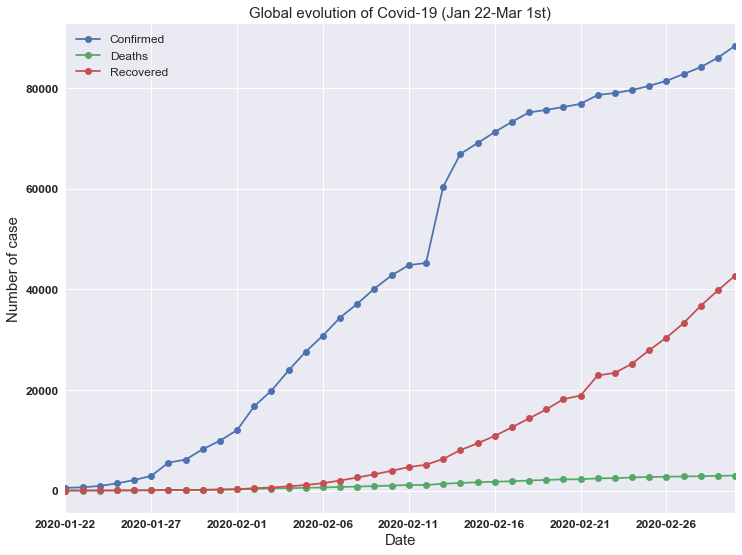

In [698]:
evo_new = new.groupby("ObservationDate")[metrics].sum()
plt.figure()
evo_new.plot(style="o-",figsize=(12,9))
plt.xticks(rotation=0)
plt.xlabel("Date",fontsize=15)
plt.ylabel("Number of case",fontsize=15)
plt.legend(loc='best',fontsize=12)
plt.xticks(weight='bold',fontsize=12)
plt.yticks(weight='bold',fontsize=12)
plt.title("Global evolution of Covid-19 (Jan 22-Mar 1st)",fontsize=15)
plt.savefig("Global evolution of Covid-19 (Jan 22-Mar 1st).png")

### The number of confirmed  cases was on average 4 times larger than the number of recorved cases and 35 times larger than the number of death cases.
For one death case there were 35 confirmed cases on average during that period.

In [667]:
print(evo_new['Confirmed'].mean()/evo_new["Recovered"].mean())
print(evo_new['Confirmed'].mean()/evo_new["Deaths"].mean())

4.2390669111166615
35.422582360238664


In [668]:
print(evo_new['Recovered'].sum()/evo_new["Confirmed"].sum())
print(evo_new['Deaths'].sum()/evo_new["Confirmed"].sum())

0.23590097088997786
0.028230578726030024


### 23% of the people who has been sick have recovered

# Recover to Confirmed Ratio VS Deaths to Confirmed Ratio

In [669]:
reco_to_confirmed = evo_new["Recovered"]/evo_new['Confirmed']
dea_to_confirmed = evo_new["Deaths"]/evo_new["Confirmed"]

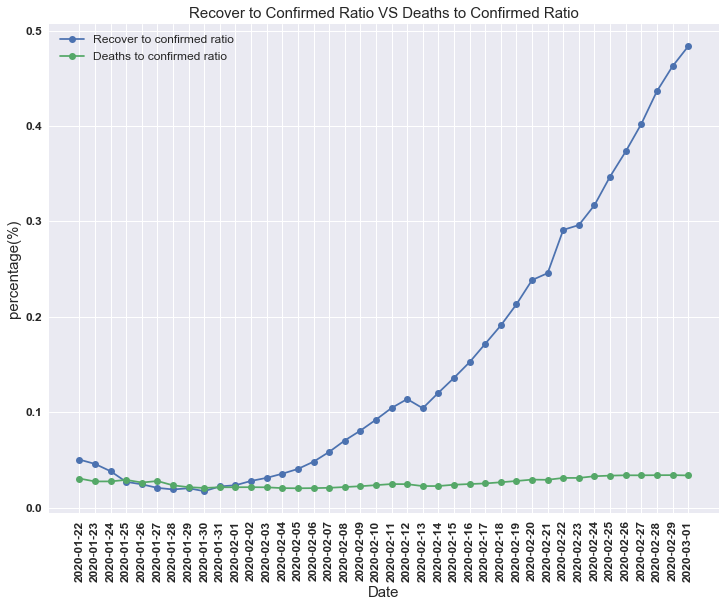

In [700]:
plt.figure(figsize=(12,9))
plt.plot(reco_to_confirmed,'o-',label='Recover to confirmed ratio')
plt.plot(dea_to_confirmed,'o-',label= "Deaths to confirmed ratio")
plt.legend(loc='best',fontsize=12)
plt.xlabel("Date",fontsize=15)
plt.ylabel("percentage(%)",fontsize=15)
plt.xticks(rotation=90)
plt.xticks(weight='bold',fontsize=12)
plt.yticks(weight='bold',fontsize=12)
plt.title("Recover to Confirmed Ratio VS Deaths to Confirmed Ratio",fontsize=15)
plt.savefig("Recover to Confirmed Ratio VS Deaths to Confirmed Ratio")

### On feburary 1st 2020,we observe that the rate of the people who has recovered given the case was confirmed was the same as the rate of death. It was about 0.25% , a week later the rate doubled then reach almost 50% in a time frame of 2 weeks while the rate of death remain almost stable at 0.3%. 

# Daily percentage change ( All Countries )

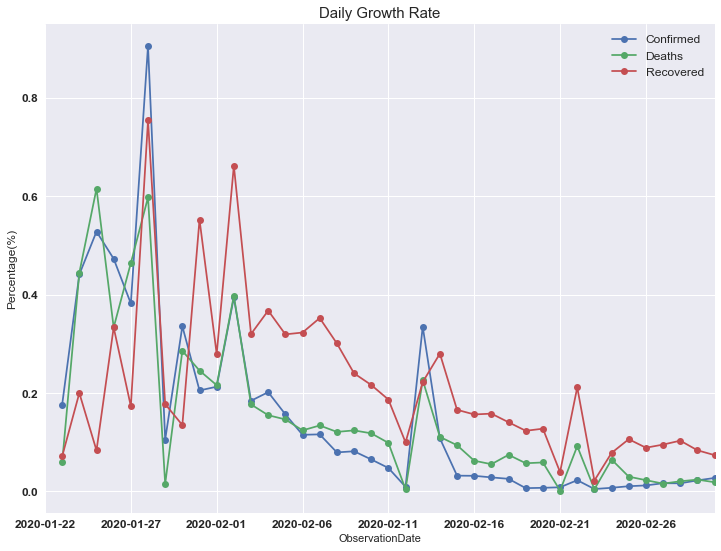

In [742]:
evo_new.pct_change(1).plot(style="o-",figsize=(12,9))
plt.title("Daily Growth Rate",fontsize=15)
plt.xticks(rotation=0,fontsize=12)
plt.ylabel("Percentage(%)",fontsize=12)
plt.legend(loc='best',fontsize=12)
plt.xticks(weight='bold',fontsize=12)
plt.yticks(weight='bold',fontsize=12)
plt.savefig("Daily Growth Rate.png")

# We see that the global growth rate of the virus is slowing down. We observe a downtrend of the number of confirmed cases.

# Breakdown
### how many people are actually sick?
for our analysis let's define a sick person, a person whose the case have been confimerd but has not yet recover and not dead.
# Sick =  Confirmed - (Recovered + Deaths)

In [672]:
evo_new['Sick'] = evo_new["Confirmed"]-evo_new["Deaths"]-evo_new["Recovered"]
evo_new = evo_new.reset_index()

In [673]:
evo_sick_new = evo_new.groupby("ObservationDate")['Confirmed', 'Deaths', 'Recovered',"Sick"].sum()

<Figure size 1080x504 with 0 Axes>

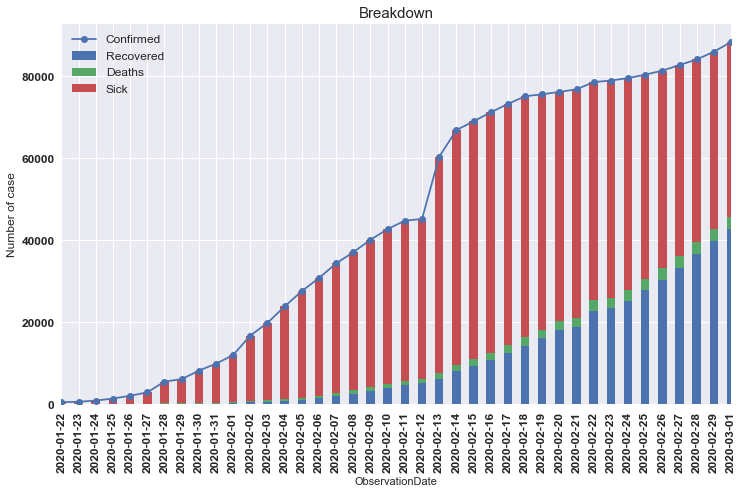

In [743]:
plt.figure(figsize=(15,7))
evo_sick_new[['Recovered','Deaths',"Sick"]].plot.bar(stacked=True,figsize=(12,7))
evo_sick_new['Confirmed'].plot(style='o-')
plt.title("Breakdown",fontsize=15)
plt.xticks(rotation=90)
plt.ylabel("Number of case",fontsize=12)
plt.xticks(weight='bold',fontsize=12)
plt.yticks(weight='bold',fontsize=12)
plt.legend(loc='best',fontsize=12)
plt.savefig("Breakdown.png")

# Confirmed case by country in Log scale
I'm using the log sclae to have a better vision of the confirmed case by country. 

No handles with labels found to put in legend.


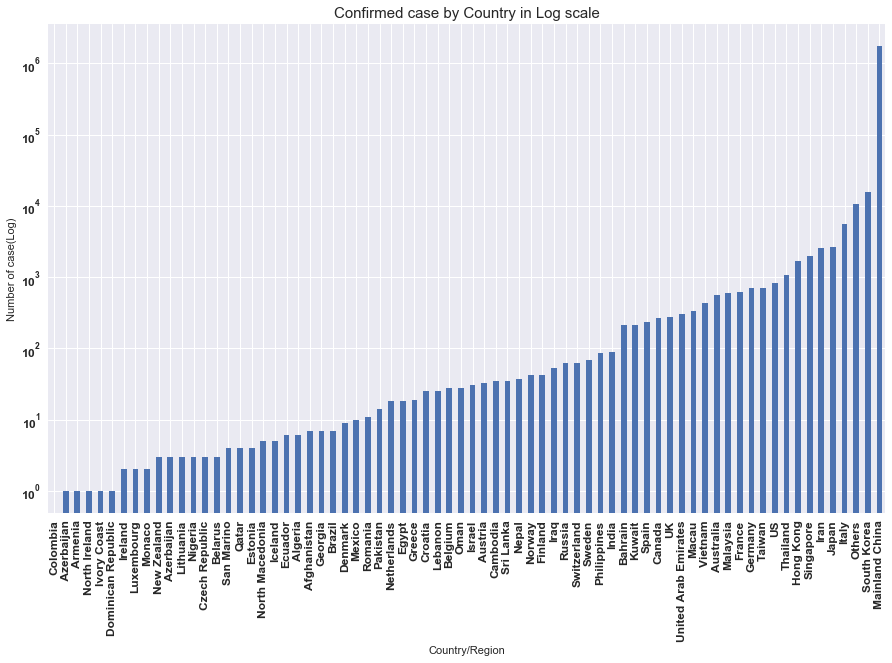

In [744]:
plt.figure(figsize=(15,9))
plt.xticks(weight='bold',fontsize=12)
plt.yticks(weight='bold',fontsize=12)
plt.legend(loc='best',fontsize=12)
plt.ylabel("Number of case(Log)")
covidLog= new.groupby("Country/Region",sort=True)["Confirmed"].sum()
covidLog=covidLog.sort_values(ascending=True)
covidLog.plot.bar(logy=True)
plt.title("Confirmed case by Country in Log scale",fontsize=15)
plt.savefig("Confirmed case by Country in Log scale.png")

### We see that China has the highest the number of confirmed cases follow by South Kerea,Italy,Japan and Iran.

# The situation in China  

In [676]:
china = new[new["Country/Region"]=="Mainland China"] 
china.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


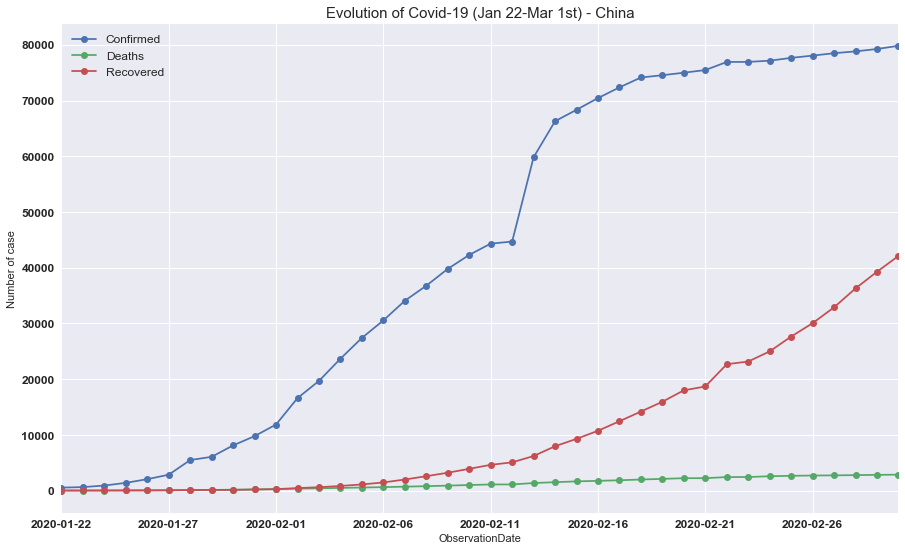

In [746]:
china_new = china.groupby("ObservationDate")[metrics].sum()
china_new.plot(style="o-",figsize=(15,9))
plt.yticks(weight='bold',fontsize=12)
plt.legend(loc='best',fontsize=12)
plt.xticks(weight='bold',fontsize=12)
plt.ylabel("Number of case")
plt.title("Evolution of Covid-19 (Jan 22-Mar 1st) - China",fontsize=15)
plt.savefig("Evolution of Covid-19 (Jan 22-Mar 1st) - China.png")

# The number of confirmed cases in China is very high it's about 80,000. It represents almost 95% of the total case in the world.
for one death that occures 34 new case was confirmed during that period from january 22th to march 3rd 2020. 

In [678]:
print(china_new['Confirmed'].mean()/china_new["Recovered"].mean())
print(china_new['Confirmed'].mean()/china_new["Deaths"].mean())

4.167847263421991
34.88817088493987


In [679]:
china_new['Sick'] = china_new["Confirmed"]-china_new["Deaths"]-china_new["Recovered"]

In [695]:
reco_to_confirmed_china = china_new["Recovered"]/china_new['Confirmed']
dea_to_confirmed_china = china_new["Deaths"]/china_new["Confirmed"]
sick_to_recovered_china = china_new["Sick"]/china_new['Recovered']

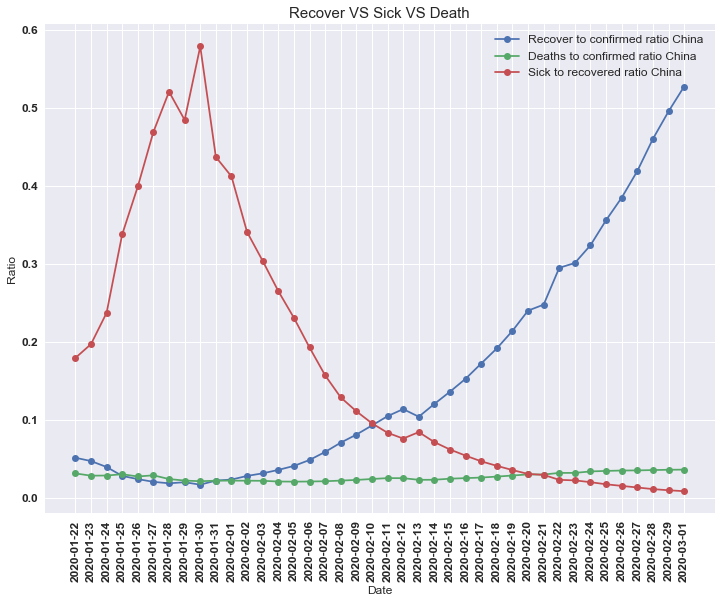

In [738]:
plt.figure(figsize=(12,9))
plt.plot(reco_to_confirmed_china,'o-',label='Recover to confirmed ratio China')
plt.plot(dea_to_confirmed_china,'o-',label= "Deaths to confirmed ratio China")
plt.plot(sick_to_recovered_china/100,'o-',label= "Sick to recovered ratio China")
plt.legend(loc='best',fontsize=12)
plt.xticks(rotation=90)
plt.xlabel("Date",fontsize=12)
plt.ylabel("Ratio",fontsize=12)
plt.xticks(weight='bold',fontsize=12)
plt.yticks(weight='bold',fontsize=12)
plt.title("Recover VS Sick VS Death",fontsize=15)
plt.savefig("Recover VS Sick VS Death (Jan 22-Mar 1st) - China.png")

### the see the rate of sickness decrease as the rate of recovering increase, the rate of death is almost constant 

# Situation outiside of china

In [421]:
not_china = new[new['Country/Region'] != 'Mainland China'].groupby('ObservationDate')[metrics].sum()
#not_hubei = data[(data['Province/State'] != "Hubei") & (data['Country'] == 'Mainland China')].groupby('date')[metrics].sum()

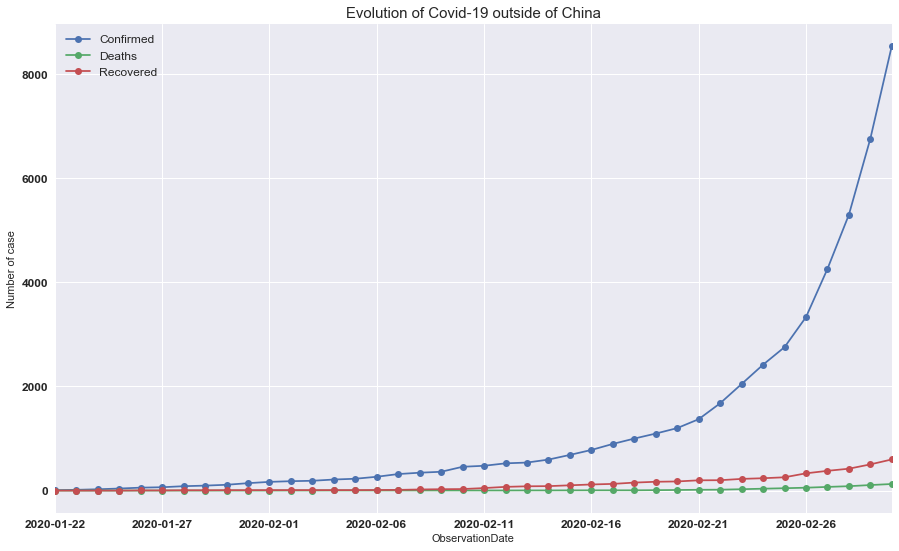

In [761]:
not_china.plot(figsize=(15,9),style="o-")
plt.xticks(weight='bold',fontsize=12)
plt.yticks(weight='bold',fontsize=12)
plt.legend(loc='best',fontsize=12)
plt.ylabel("Number of case")
plt.title("Evolution of Covid-19 outside of China",fontsize=15)
plt.savefig("Recover VS Sick VS Death (Jan 22- Mar 1st) - Outside of China.png")

## The number of confirmed case is still incresing outside of china with almost 10,000 confirmed cases.

## DAILY GROWTH RATE OUTSIDE OF CHINA

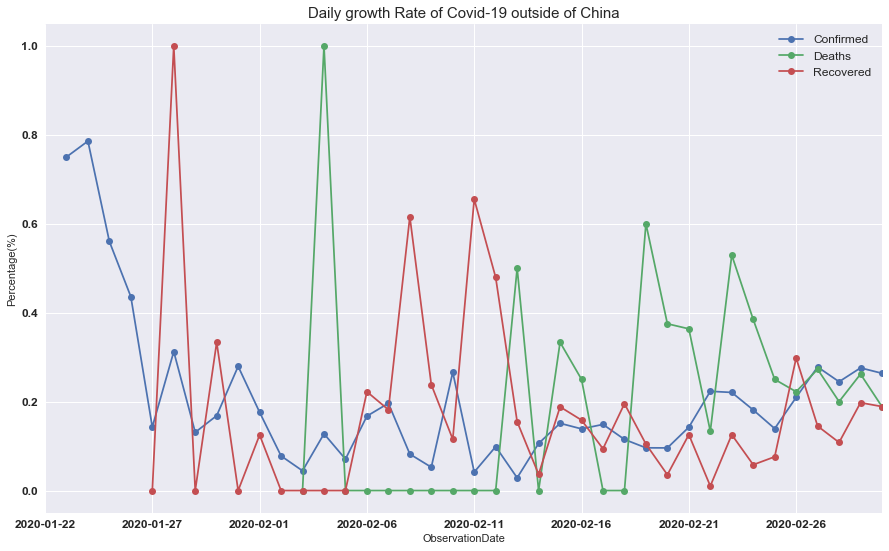

In [760]:
not_china.pct_change(1).plot(figsize=(15,9),style="o-")
plt.xticks(weight='bold',fontsize=12)
plt.yticks(weight='bold',fontsize=12)
plt.legend(loc='best',fontsize=12)
plt.ylabel("Percentage(%)")
plt.title("Daily growth Rate of Covid-19 outside of China",fontsize=15)
plt.savefig("Daily Change of Case of Covid-19 outside of China (Jan 22- Mar 1st) - Outside of China.png")

## The daily growth rate show an increase of comfirmed case after a droped from the past 2 weeks ago. 

# Spread of the disease in a one month window (Jan22 - Feb 20)

In [571]:
df = pd.read_csv("/Users/pm3796gb/Downloads/time_series_covid_19_deaths.csv")

In [572]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20
0,Anhui,Mainland China,31.82571,117.2264,0,0,0,0,0,0,...,4,4,5,6,6,6,6,6,6,6
1,Beijing,Mainland China,40.18238,116.4142,0,0,0,0,0,1,...,3,3,3,3,4,4,4,4,4,4
2,Chongqing,Mainland China,30.05718,107.8740,0,0,0,0,0,0,...,3,3,4,5,5,5,5,5,5,6
3,Fujian,Mainland China,26.07783,117.9895,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Gansu,Mainland China,36.06110,103.8343,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [573]:
loc = df[['Province/State',"Country/Region",'Lat',"Long"]]
df_new=df.drop(columns=["Lat","Long"])

In [574]:
#sum of confirmed cases from jan 22 to feb 22
df_new["Total"] = df_new.sum(axis=1)

In [575]:
df_new.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,Total
0,Anhui,Mainland China,0,0,0,0,0,0,0,0,...,4,5,6,6,6,6,6,6,6,59
1,Beijing,Mainland China,0,0,0,0,0,1,1,1,...,3,3,3,4,4,4,4,4,4,54
2,Chongqing,Mainland China,0,0,0,0,0,0,0,0,...,3,4,5,5,5,5,5,5,6,65
3,Fujian,Mainland China,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,Gansu,Mainland China,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,25


In [576]:
covid = pd.concat([df_new,loc],axis=1)
covid.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,Total,Province/State,Country/Region,Lat,Long
0,Anhui,Mainland China,0,0,0,0,0,0,0,0,...,6,6,6,6,6,59,Anhui,Mainland China,31.82571,117.2264
1,Beijing,Mainland China,0,0,0,0,0,1,1,1,...,4,4,4,4,4,54,Beijing,Mainland China,40.18238,116.4142
2,Chongqing,Mainland China,0,0,0,0,0,0,0,0,...,5,5,5,5,6,65,Chongqing,Mainland China,30.05718,107.8740
3,Fujian,Mainland China,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,Fujian,Mainland China,26.07783,117.9895
4,Gansu,Mainland China,0,0,0,0,0,0,0,0,...,2,2,2,2,2,25,Gansu,Mainland China,36.06110,103.8343


In [609]:
m = folium.Map(zoom_start=2)

In [615]:
for i in range(0,len(covid)):
    folium.Circle(
      location=[covid.iloc[i]['Lat'], covid.iloc[i]['Long']],
      popup=covid.iloc[i]['Country/Region'],
      radius=covid.iloc[i]['Total'],
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)


In [616]:
m

In [617]:
m.save("worldwide.png")

### We see that all the continent have been touched by the virus in the month period.